# Explore SVD based word embedding

This notebook explores word embeddings that are based on SVD of a possibly transformed word-context matrix. Starting with the raw matrix `counts`

- possilby transform `counts` (e.g. log data, do PPMI transform, normalize rows)
- compute SVD of new matrix
- explore word embeddings e.g. scores plots, word similarity
- explore loadings

The material in this notebook is covered in chapters 15/16 of SLP3
- https://web.stanford.edu/~jurafsky/slp3/15.pdf
- https://web.stanford.edu/~jurafsky/slp3/16.pdf


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

from scipy.sparse.linalg import svds, norm
from scipy.sparse import diags, csr_matrix, dok_matrix

# import local code files
import sys, os
sys.path.append(os.getcwd() + '/code/')

# working with word embeddings
from save import load_vocabulary, load_matrix
from ppmi import calc_ppmi
from word_similarity import similarity, closest
from transform_counts import remove_zero_count_words

# exploring/visualizing scores/loadings
from scores_viz import scores_plot, filter_scores
from explore_loadings import top_loading_components, top_loading_words, top_loading_words_df

# only import this if you have plot.ly installed
# from viz_plotly import interactive_scores_plot

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
w2i, i2w = load_vocabulary('data/vocab.txt')
counts = load_matrix('data/scotus_counts')

In [3]:
counts, w2i, i2w = remove_zero_count_words(counts, i2w)

# transform counts


In [4]:
# normalized row by row norms
counts_normed = diags(1.0/norm(counts, axis=1)) * counts 

In [5]:
counts_log = counts
counts_log.data = np.log(1 + counts.data)

In [6]:
ppmi = calc_ppmi(counts)

# SVD of counts matrix

If $X \in \mathbb{R}^{n \times d}$ is a data matrix with the n observations on rows then the rank K SVD is given by
$$X \approx U D V^T$$
where $U \in \mathbb{R}^{n \times K}$ is the matrix of normalized scores and  $V \in \mathbb{R}^{d \times K}$ is the matrix of loadings.

If X is a word-context matrix then U (or UD) gives a word embedding.

In [7]:
%%time
k = 10

normed_scores, sing_vals, loadings =  svds(counts_normed, k)

loadings = loadings.T
un_normed_scores = normed_scores * sing_vals

CPU times: user 13.4 s, sys: 92.2 ms, total: 13.5 s
Wall time: 13.3 s


In [8]:
embedding = un_normed_scores

# Explore word embedding (scores)

In [ ]:
scores_plot(embedding,
            start=1,
            n_comp=3,
            title='',
            comp_names=None)

In [ ]:
# this won't run if you don't have plot.ly already installed
# from py_fun_iain.dim_red.viz_plotly import interactive_scores_plot
# interactive_scores_plot(scores,comp1=1, comp2=3, labels=iw)

# simlarity

In [31]:
word1 = 'lawyer'
word2 = 'lawyers'

similarity(word1, word2, embedding, w2i, sim='angle')

5.7688273396389373

In [33]:
word = 'lawyer'
closest(word, embedding, w2i, N=10)

['woods',
 'sprague',
 '5983',
 'hennings',
 'canes',
 'sowell',
 'regularize',
 'spiders',
 'woodb',
 'verplank']

# explore loadings

In [34]:
top_loading_df = top_loading_words_df(loadings, i2w, n=30)

top_loading_df

,1,2,3,4,5,6,7,8,9,10
1,by,states,of,at,the,and,v,to,the,the
2,at,v,and,the,of,of,states,the,of,of
3,and,by,states,states,at,for,us,by,to,to
4,to,in,that,by,to,to,the,of,and,and
5,for,us,in,and,states,the,at,v,in,in
6,a,of,to,id,a,by,see,line,a,a
7,in,at,a,of,in,on,united,and,that,that
8,v,§,is,a,that,with,to,straight,states,for
9,id,see,not,arc,id,v,by,states,for,by
10,line,to,it,centered,is,at,co,us,us,is


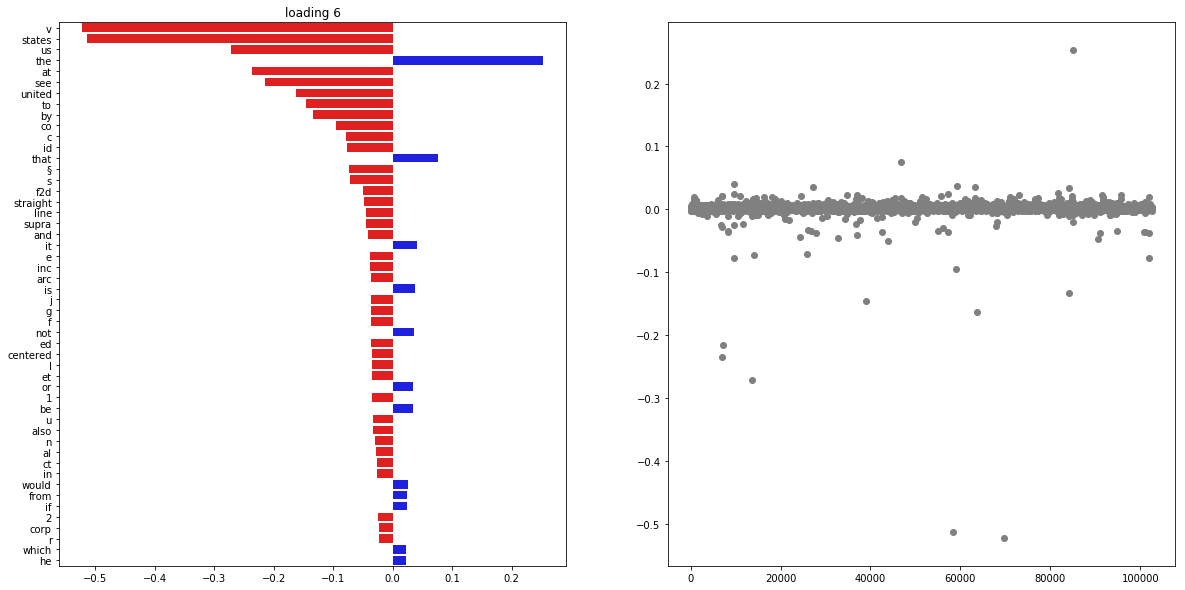

In [12]:
comp_numer = 6  # which loading
n = 50 # how many components to show

plt.figure(figsize=[20, 10])

plt.subplot(1,2,1)
top_loading_components(loadings[:, comp_numer], i2w, n, comp_numer)


plt.subplot(1,2,2)
plt.scatter(range(loadings.shape[0]), loadings[:, comp_numer], color='grey')